In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

# set display options

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries Loaded Successfully")

Libraries Loaded Successfully


In [13]:
df = pd.read_csv('data/raw/tb_climate_data.csv')

# First look at data
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

Dataset Shape: (112497, 20)

First 5 rows:
  District      Date  AQI     CO   Humidity   NH3  NO2     O3    PM10   PM2.5  \
0   Achham  1/1/2021  5.0  699.56     31.65  4.48  4.61  41.96  106.54  85.15   
1   Achham  2/1/2021  5.0  634.19     33.12  6.01  4.12  41.47   82.56  62.99   
2   Achham  3/1/2021  4.0  491.50     51.24  2.69  3.15  32.96   42.73  30.27   
3   Achham  4/1/2021  4.0  572.03     49.74  3.17  4.18  29.29   50.00  32.44   
4   Achham  5/1/2021  4.0  620.15     41.81  1.88  4.27  26.38   50.37  33.63   

   Precipitation   Air Pressure   SO2  Solar Radiation  TB Case  Avg Temp  \
0            0.00         96.96  1.19             3.35      1.0     16.87   
1            0.22         96.89  1.43             3.01      NaN     18.18   
2            8.69         96.79  0.76             2.26      NaN     19.49   
3            0.40         96.77  1.03             2.57      1.0     20.48   
4            0.80         96.84  0.67             3.40      NaN     21.26   

   Temp

Missing Values:
         Missing Count  Percentage
AQI                308    0.273785
CO                 308    0.273785
NH3                308    0.273785
NO2                308    0.273785
O3                 308    0.273785
PM10               308    0.273785
PM2.5              308    0.273785
SO2                308    0.273785
TB Case          61964   55.080580


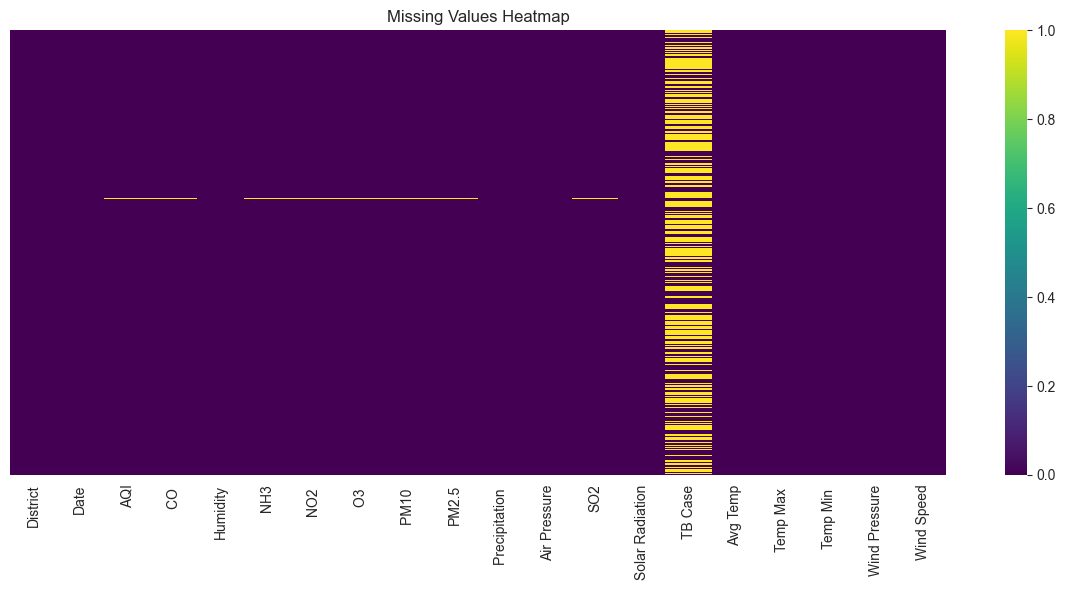

In [14]:
#check for missing values

print("Missing Values:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.savefig('figures/missing_values.png', dpi=300)
plt.show()

In [15]:
# check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check date range
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True) #changing the format to day first
print(f"\nDate Range:")
print(f"Start: {df['Date'].min()}")
print(f"End: {df['Date'].max()}")
print(f"Total Days: {(df['Date'].max() - df['Date'].min()).days}")

Number of duplicate rows: 0

Date Range:
Start: 2021-01-01 00:00:00
End: 2024-12-31 00:00:00
Total Days: 1460


In [16]:
# ststistical summary
print("Descriptive Statistics:")
print(df.describe())

# Check for outliers (values beyond 3 standard deviations)
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    mean = df[col].mean()
    std = df[col].std()
    outliers = df[(df[col] < mean - 3*std) | (df[col] > mean + 3*std)]
    if len(outliers) > 0:
        print(f"\n{col}: {len(outliers)} potential outliers")

Descriptive Statistics:
                      Date            AQI            CO        Humidity  \
count               112497  112189.000000  112189.000000  112497.000000   
mean   2023-01-01 00:00:00       3.059435     648.879823      67.166971   
min    2021-01-01 00:00:00       1.000000      96.940000       6.530000   
25%    2022-01-01 00:00:00       2.000000     356.730000      51.030000   
50%    2023-01-01 00:00:00       3.000000     501.790000      71.600000   
75%    2024-01-01 00:00:00       5.000000     737.110000      85.550000   
max    2024-12-31 00:00:00       5.000000    8117.680000      99.760000   
std                    NaN       1.459724     549.318139      20.639562   

                 NH3           NO2             O3           PM10   \
count  112189.000000  112189.000000  112189.000000  112189.000000   
mean        7.345359       5.015127      56.181157      64.831629   
min         0.020000    -416.580000    -403.940000    -415.310000   
25%         1.660000    

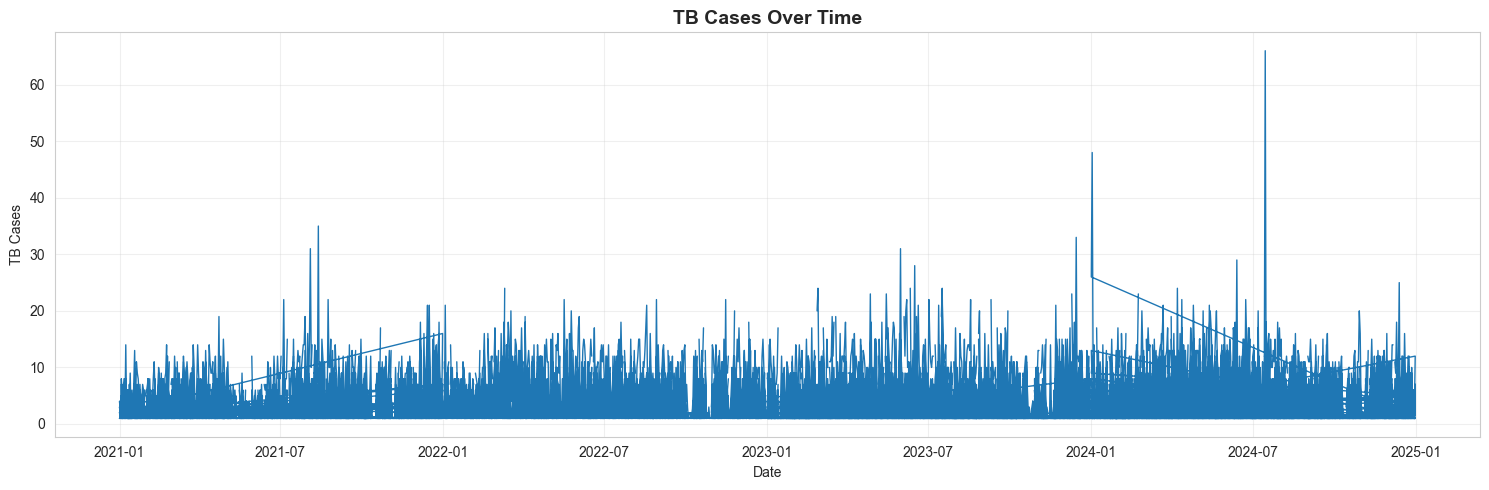

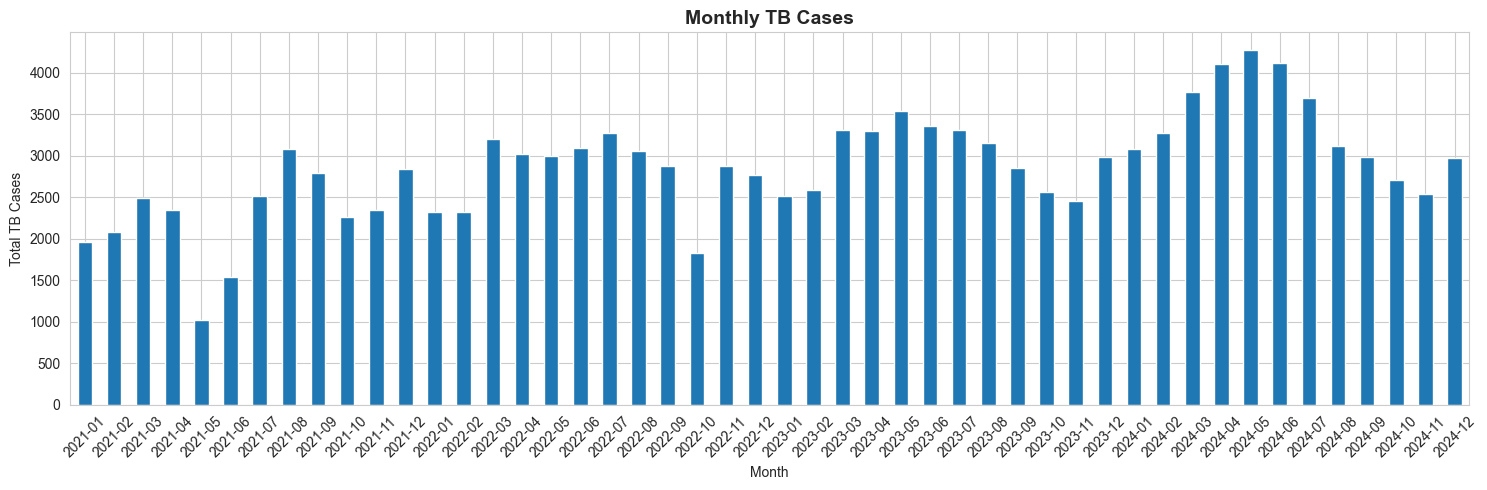

In [17]:
# TB cases time series
plt.figure(figsize=(15, 5))
plt.plot(df['Date'], df['TB Case'], linewidth=1)
plt.title('TB Cases Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('TB Cases')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('figures/tb_timeseries.png', dpi=300)
plt.show()

# Monthly aggregation
df['Year_Month'] = df['Date'].dt.to_period('M')
monthly_tb = df.groupby('Year_Month')['TB Case'].sum()

plt.figure(figsize=(15, 5))
monthly_tb.plot(kind='bar')
plt.title('Monthly TB Cases', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total TB Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figures/monthly_tb.png', dpi=300)
plt.show()

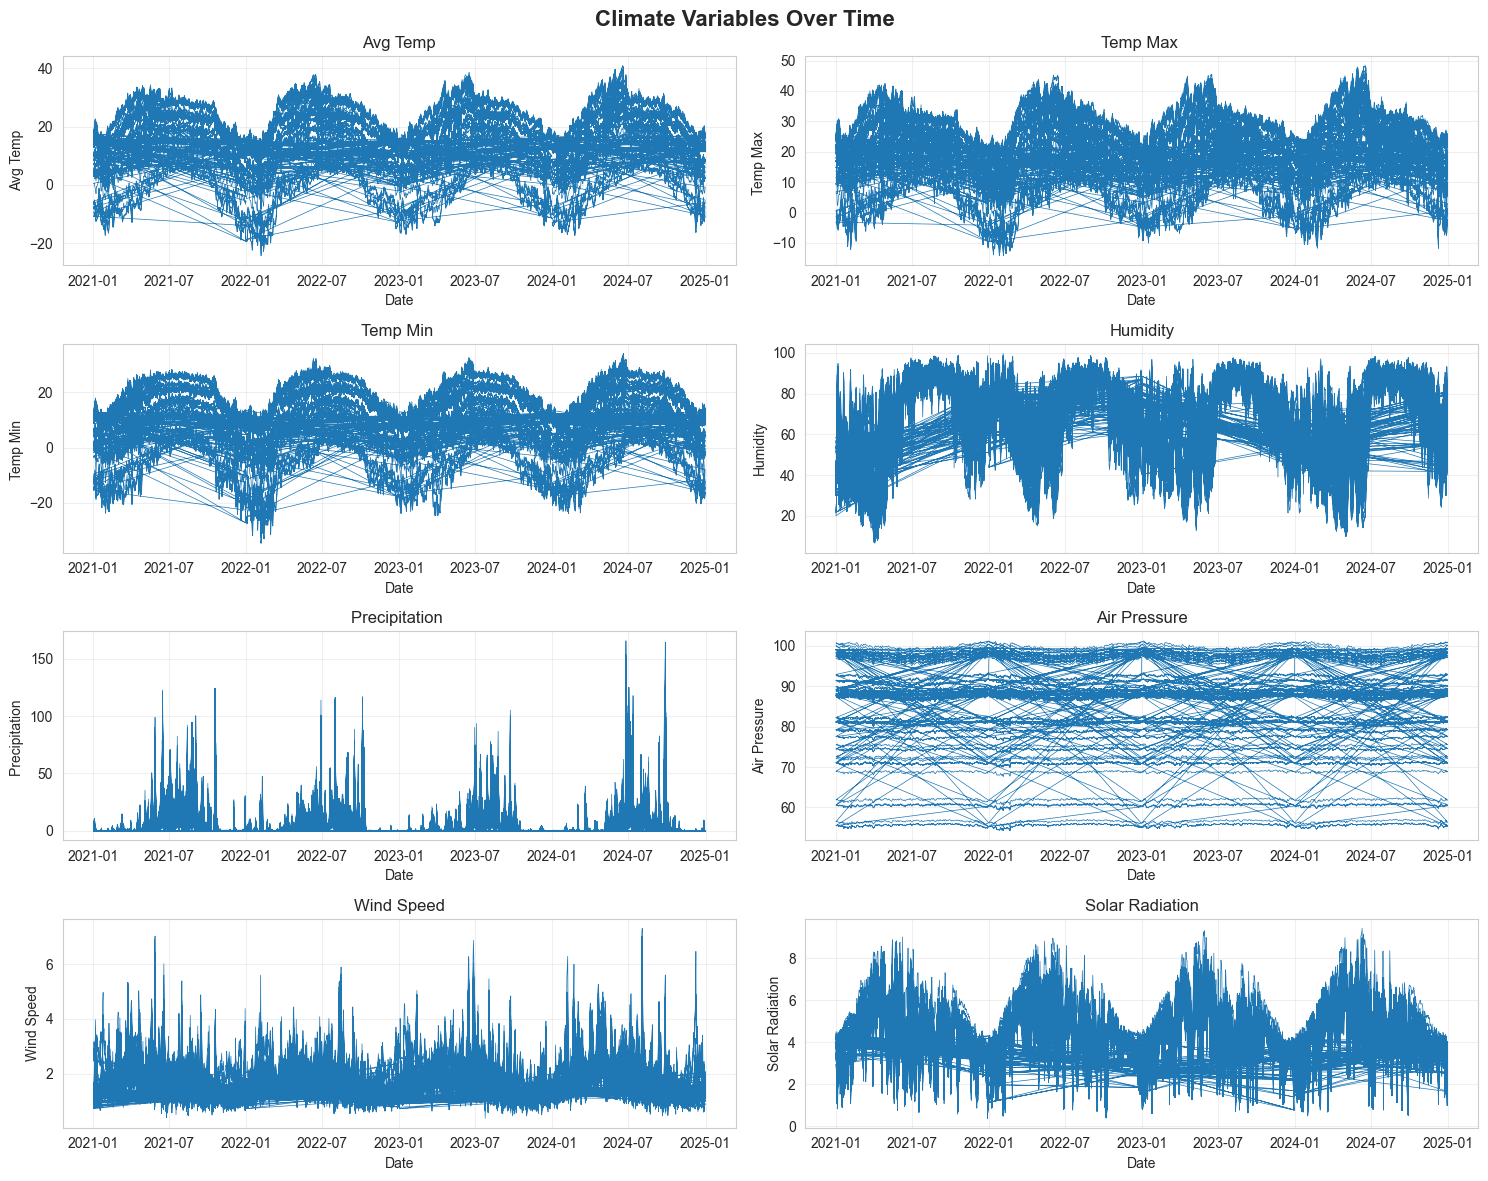

In [18]:
# climate variables over time
fig, axes = plt.subplots(4, 2, figsize=(15, 12))
fig.suptitle('Climate Variables Over Time', fontsize=16, fontweight='bold')

climate_vars = ['Avg Temp', 'Temp Max ', 'Temp Min ', 'Humidity', 
                'Precipitation ', 'Air Pressure', 'Wind Speed', 'Solar Radiation']

for idx, var in enumerate(climate_vars):
    ax = axes[idx//2, idx%2]
    ax.plot(df['Date'], df[var], linewidth=0.5)
    ax.set_title(var)
    ax.set_xlabel('Date')
    ax.set_ylabel(var)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/climate_timeseries.png', dpi=300)
plt.show()

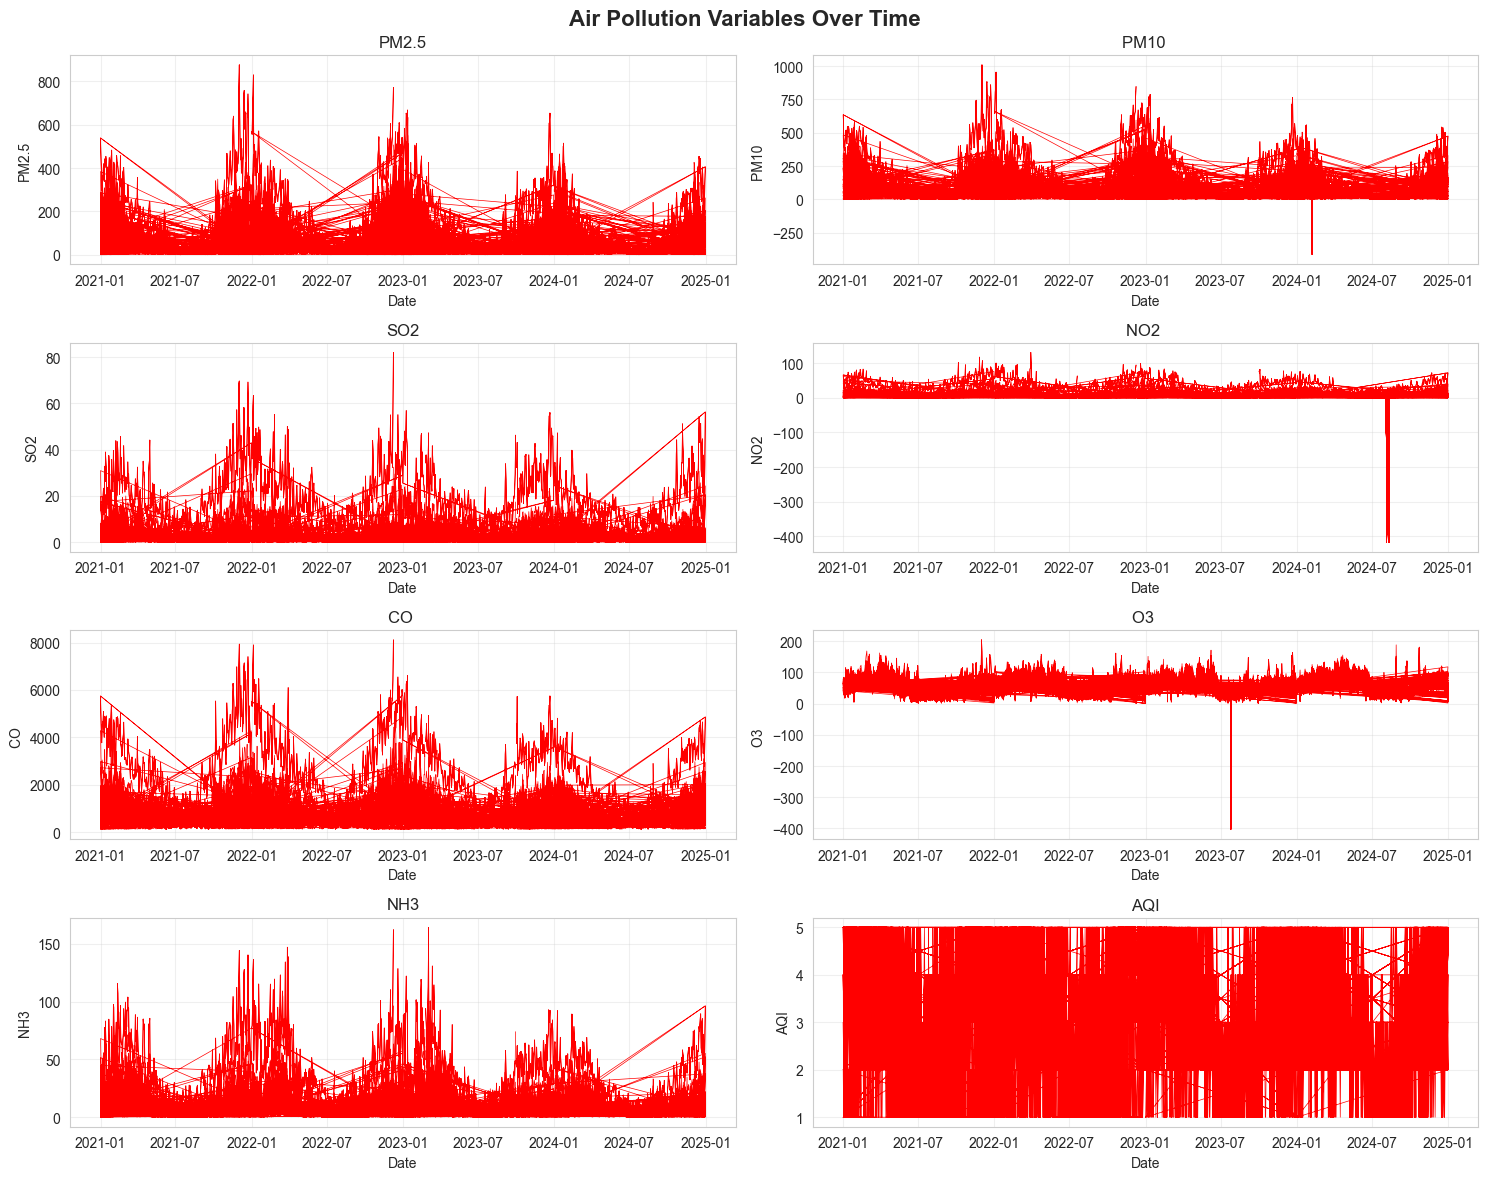

In [19]:
# pollution variables over time
fig, axes = plt.subplots(4, 2, figsize=(15, 12))
fig.suptitle('Air Pollution Variables Over Time', fontsize=16, fontweight='bold')

pollution_vars = ['PM2.5', 'PM10 ', 'SO2', 'NO2 ', 'CO ', 'O3 ', 'NH3', 'AQI']

for idx, var in enumerate(pollution_vars):
    ax = axes[idx//2, idx%2]
    ax.plot(df['Date'], df[var], linewidth=0.5, color='red')
    ax.set_title(var)
    ax.set_xlabel('Date')
    ax.set_ylabel(var)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/pollution_timeseries.png', dpi=300)
plt.show()

Correlation with TB Cases:
TB Case            1.000000
Air Pressure       0.307869
Temp Max           0.266612
Avg Temp           0.252558
Temp Min           0.236050
AQI                0.129999
SO2                0.120632
CO                 0.120380
PM10               0.109942
PM2.5              0.107482
O3                 0.072014
Wind Pressure      0.058917
Solar Radiation    0.052422
NO2                0.050061
Wind Speed         0.048176
NH3                0.022562
Precipitation     -0.008364
Humidity          -0.065522
Name: TB Case, dtype: float64


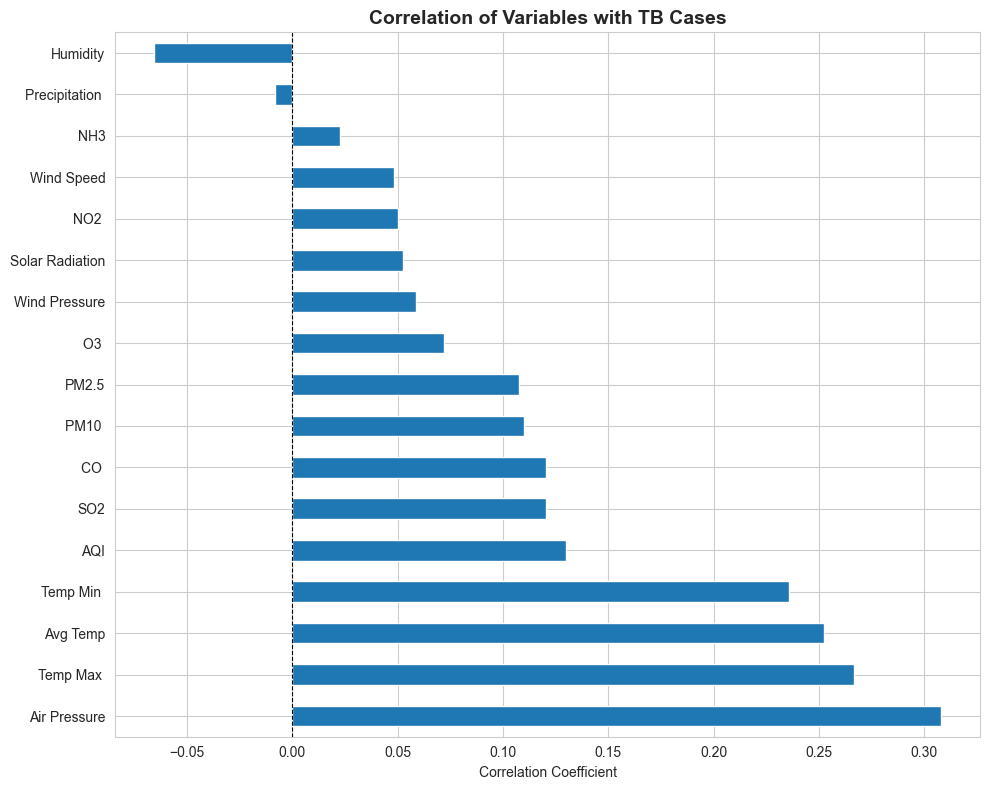

In [20]:
# Correlation with TB Cases
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation with TB Case
tb_correlation = numeric_df.corr()['TB Case'].sort_values(ascending=False)
print("Correlation with TB Cases:")
print(tb_correlation)

# Visualize
plt.figure(figsize=(10, 8))
tb_correlation.drop('TB Case').plot(kind='barh')
plt.title('Correlation of Variables with TB Cases', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.savefig('figures/correlation_tb.png', dpi=300)
plt.show()

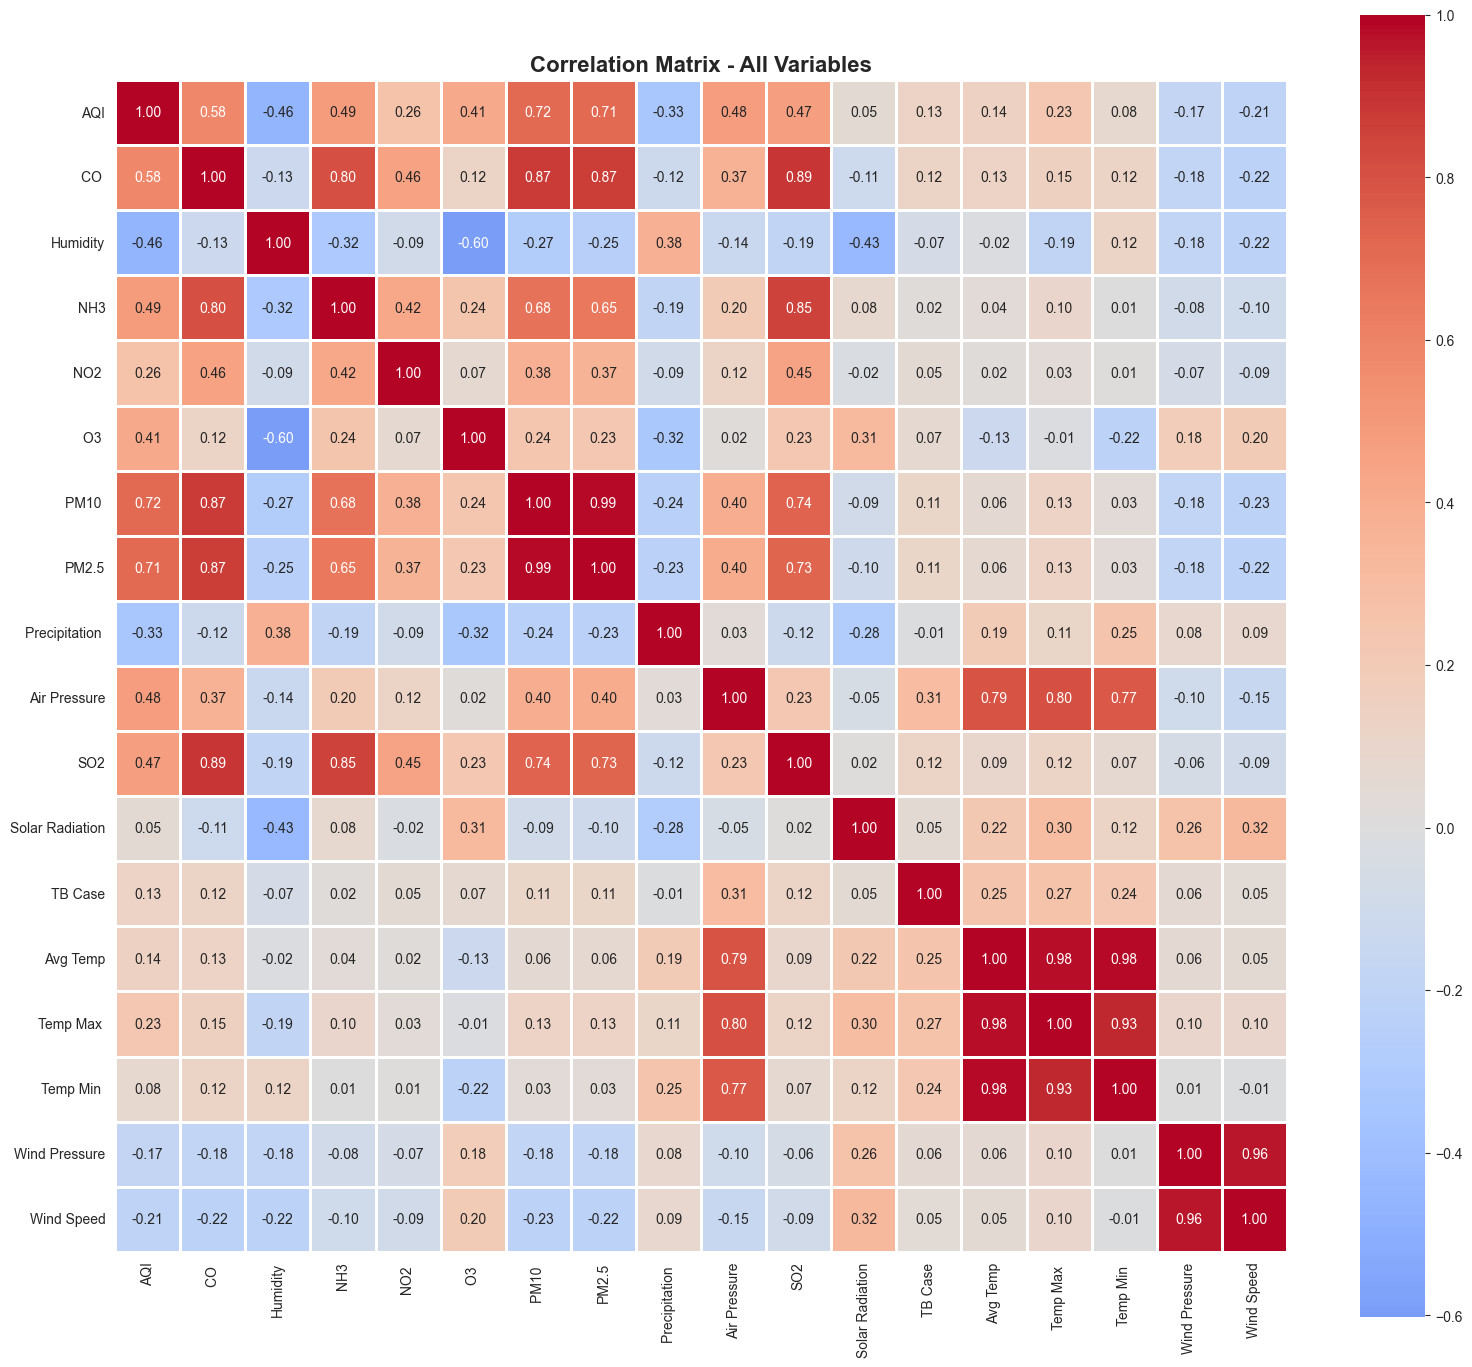

In [21]:
# Full correlation matrix
plt.figure(figsize=(16, 14))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix - All Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('figures/correlation_matrix.png', dpi=300)
plt.show()

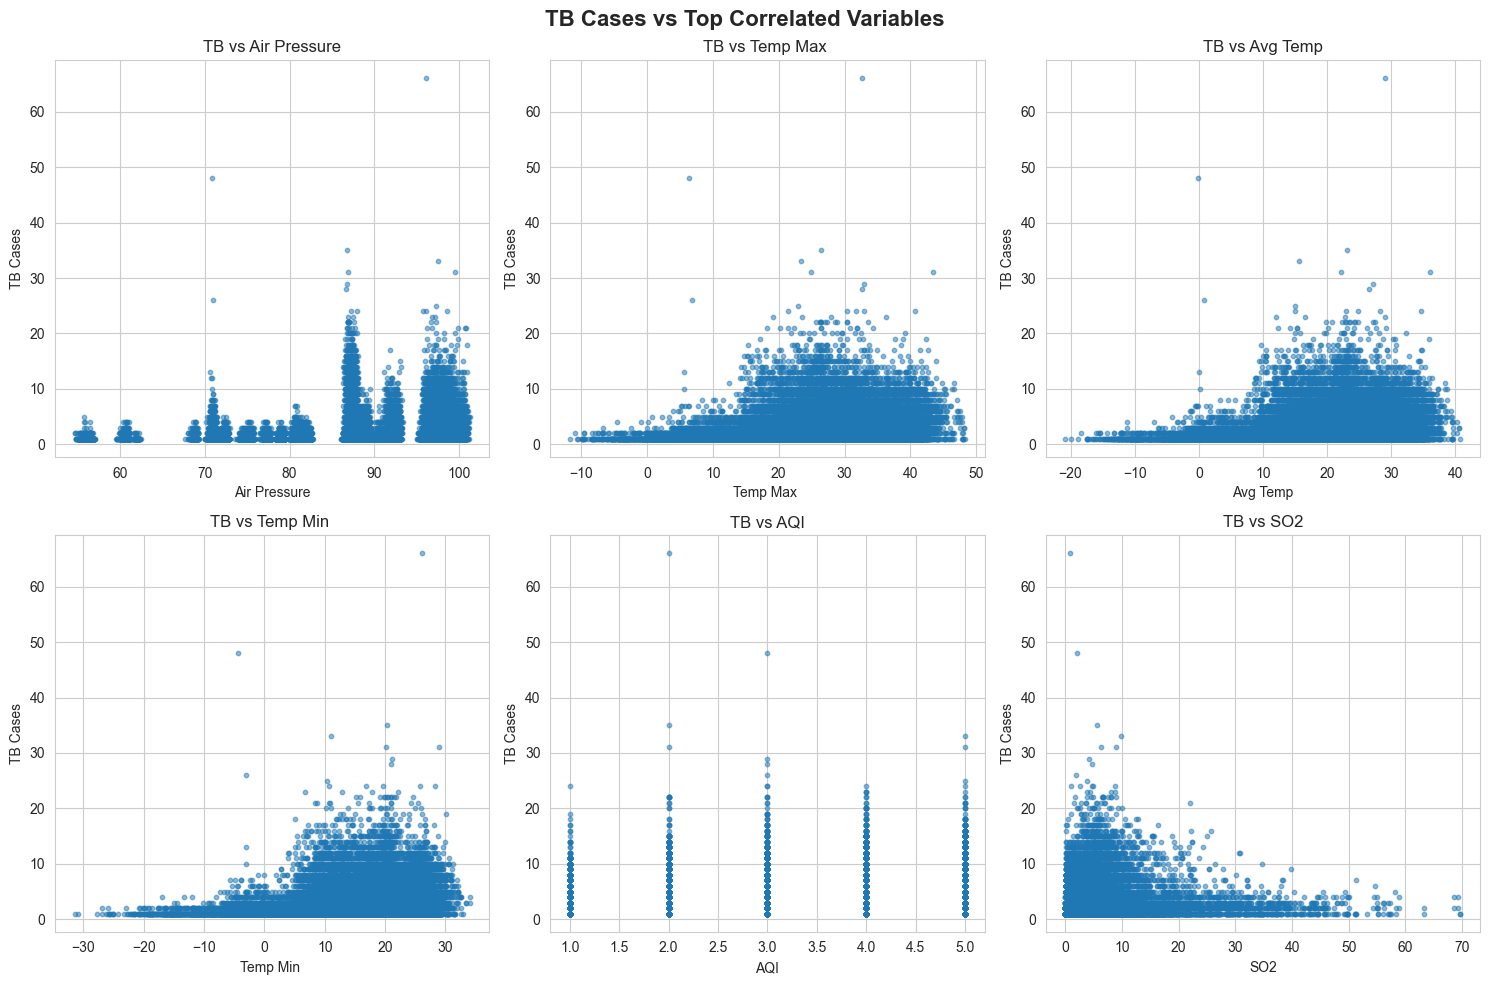

In [22]:
# Scatter plots - TB vs key variables
# Identify top 6 correlated variables (excluding TB Case itself)
top_vars = tb_correlation.drop('TB Case').head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('TB Cases vs Top Correlated Variables', fontsize=16, fontweight='bold')

for idx, var in enumerate(top_vars):
    ax = axes[idx//3, idx%3]
    ax.scatter(df[var], df['TB Case'], alpha=0.5, s=10)
    ax.set_xlabel(var)
    ax.set_ylabel('TB Cases')
    ax.set_title(f'TB vs {var}')
    
    # Add trend line
    z = np.polyfit(df[var].dropna(), df.loc[df[var].notna(), 'TB Case'], 1)
    p = np.poly1d(z)
    ax.plot(df[var], p(df[var]), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.savefig('figures/scatter_tb_vs_variables.png', dpi=300)
plt.show()

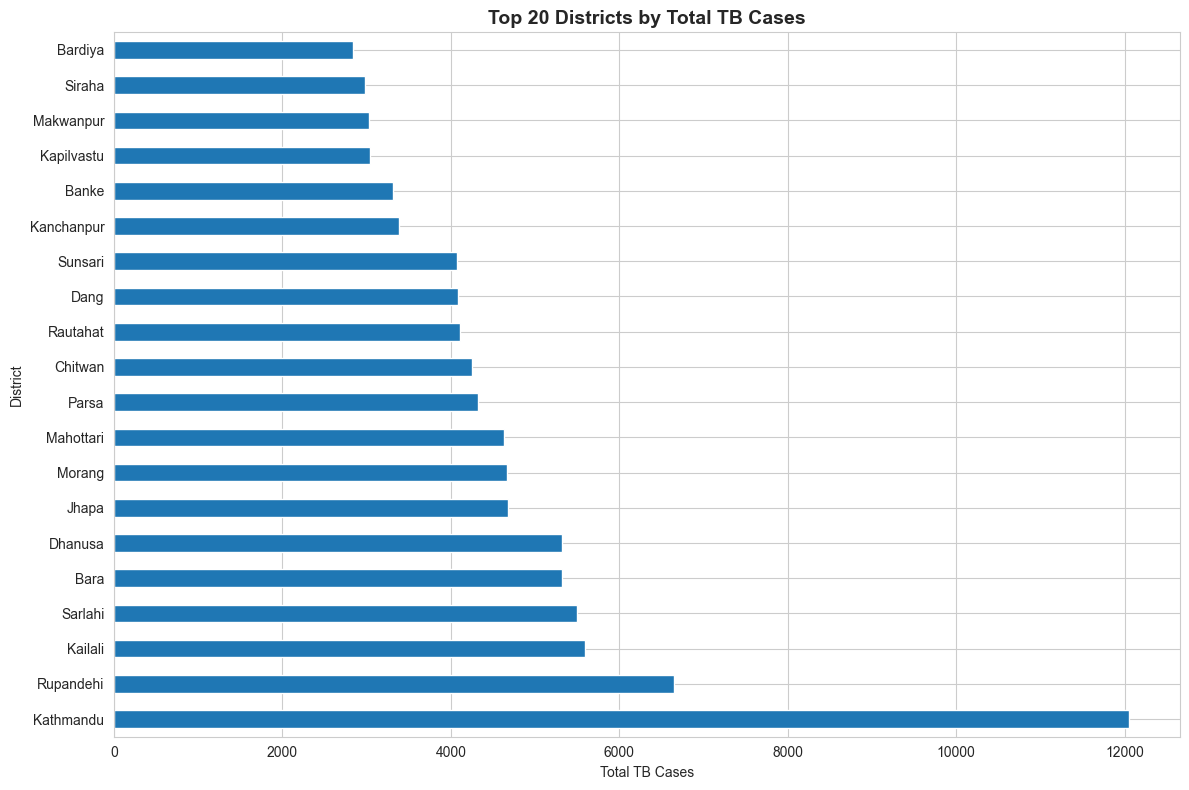


Total Districts: 77

Top 10 Districts:
District
Kathmandu    12055.0
Rupandehi     6655.0
Kailali       5587.0
Sarlahi       5499.0
Bara          5320.0
Dhanusa       5314.0
Jhapa         4682.0
Morang        4661.0
Mahottari     4630.0
Parsa         4322.0
Name: TB Case, dtype: float64


In [23]:
# TB cases by district
district_tb = df.groupby('District')['TB Case'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
district_tb.head(20).plot(kind='barh')
plt.title('Top 20 Districts by Total TB Cases', fontsize=14, fontweight='bold')
plt.xlabel('Total TB Cases')
plt.ylabel('District')
plt.tight_layout()
plt.savefig('figures/district_tb.png', dpi=300)
plt.show()

print(f"\nTotal Districts: {df['District'].nunique()}")
print(f"\nTop 10 Districts:")
print(district_tb.head(10))